# Tick 2a

In [1]:
import pandas as pd
import numpy as np
import ucamcl
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp')
GRADER2a = GRADER.subsection('tick2a')

Waiting for you to log in ... done.


# question1

In [78]:
#deleting rows of missing populations
url = 'https://www.cl.cam.ac.uk/teaching/2122/DataSci/data/covid_global_20211210.csv'
covid = pd.read_csv(url)
covid_q1 = covid.loc[~pd.isna(covid.Population)]
covid_q1.loc[(covid_q1['Country/Region'] == 'Netherlands') & (covid_q1['Date'] == '12/9/21')]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Population,iso3
192553,Aruba,Netherlands,12.5211,-69.9683,12/9/21,16531,176,0,106766.0,ABW
192554,"Bonaire, Sint Eustatius and Saba",Netherlands,12.1784,-68.2385,12/9/21,3109,22,0,26221.0,BES
192555,Curacao,Netherlands,12.1696,-68.9900,12/9/21,17540,180,0,164100.0,CUW
192556,Sint Maarten,Netherlands,18.0425,-63.0548,12/9/21,4624,75,0,42882.0,SXM
192557,NaN,Netherlands,52.1326,5.2913,12/9/21,2828655,19919,0,17134873.0,NLD


In [3]:
num_rows = 191952
GRADER2a.submit_answer(GRADER2a.fetch_question('q1'), num_rows)

Correct!


True

# question2

In [4]:
#finding uniques pairs of country and states for those removed countries
covid_q2 = covid.loc[pd.isna(covid.Population)]
covid_q2 = covid_q2.groupby(['Country/Region', 'Province/State'], dropna = False).apply(len).reset_index(name = "size")
del covid_q2['size']
covid_q2

,Country/Region,Province/State
0,Canada,Diamond Princess
1,Canada,Grand Princess
2,Canada,Repatriated Travellers
3,China,Unknown
4,Diamond Princess,NaN
5,MS Zaandam,NaN
6,Summer Olympics 2020,NaN


In [5]:
#test question2:
ans = covid_q2 # your answer as a DataFrame
GRADER2a.submit_answer(GRADER2a.fetch_question('q2'), ans)

Correct!


True

# question 3

In [6]:
#finding states of UK
covid_q3 = covid_q1.groupby(['Country/Region', 'Province/State'], dropna = False).apply(len)
covid_q3 = covid_q3['United Kingdom']
covid_q3

Province/State
Anguilla                                        688
Bermuda                                         688
British Virgin Islands                          688
Cayman Islands                                  688
Channel Islands                                 688
Falkland Islands (Malvinas)                     688
Gibraltar                                       688
Isle of Man                                     688
Montserrat                                      688
Saint Helena, Ascension and Tristan da Cunha    688
Turks and Caicos Islands                        688
NaN                                             688
dtype: int64

In [7]:
#test question 3
ans = covid_q3
GRADER2a.submit_answer(GRADER2a.fetch_question('q3'), ans.reset_index(name='n'))

Correct!


True

# question4

In [8]:
#finding countries without NaN provinces

#find those countries with at least one non-nan province
index_filtered_nan = covid_q1.groupby('Country/Region')['Province/State'].\
apply(lambda x: x.count().astype(bool)).reset_index()

#find the number of unique provinces(.unique would count nan)
provinces = covid_q1.groupby('Country/Region')['Province/State'].\
apply(lambda x: x.nunique(dropna = True)).reset_index()

#count the metropole
metropole = covid_q1.groupby('Country/Region')['Province/State'].\
apply(lambda x: (x.count().astype(bool) & x.hasnans).astype(int)).reset_index()

index_filtered_nan = index_filtered_nan['Province/State']

covid_q4 = provinces.loc[index_filtered_nan]

covid_q4 = covid_q4.merge(metropole, on = 'Country/Region')
covid_q4.rename(columns = {'Province/State_x' : 'provinces', 'Province/State_y':'metropole'}, inplace=True)
covid_q4 = covid_q4[['Country/Region', 'metropole', 'provinces']]
covid_q4

,Country/Region,metropole,provinces
0,Australia,0,8
1,Canada,1,13
2,China,0,33
3,Denmark,1,2
4,France,1,11
5,Netherlands,1,4
6,New Zealand,1,1
7,United Kingdom,1,11


In [9]:
#test question 4
ans = covid_q4 # your answer as a DataFrame
GRADER2a.submit_answer(GRADER2a.fetch_question('q4'), ans)

Correct!


True

# question5

In [106]:
#convert the format of dates
url2 = 'https://www.cl.cam.ac.uk/teaching/2122/DataSci/data/covidcountries_20210831.csv'
covidr = covid_q1.copy()
covid_0831 = pd.read_csv(url)
covidr['Date'] = pd.to_datetime(covidr['Date'])

spec_countries = ['Australia', 'Canada', 'China', 'Denmark', 'France', 'Netherlands', 'New Zealand', 'United Kingdom']
#new_pop = covid_0831.loc[(covid_0831['Country/Region'].isin(spec_countries))]
new_pop = covid_0831.groupby('Country/Region')[['Population']].apply(max).reset_index()

#special case one: add up all the statistics of provinces
tmp = covidr.loc[covidr['Country/Region'].isin(['Australia', 'Canada', 'China'])]
confirm = tmp.groupby(['Country/Region', 'Date'])['Confirmed'].apply(sum).reset_index()
deaths = tmp.groupby(['Country/Region', 'Date'])['Deaths'].apply(sum).reset_index()
#population = tmp.groupby(['Country/Region', 'Date'])['Population'].apply(sum).reset_index()

confirm['Deaths'] = deaths['Deaths']
#confirm['Population'] = population['Population']
case1 = confirm.merge(new_pop, how = 'left', on = 'Country/Region')
case1['Population'].loc[case1['Country/Region'] == 'China'] = 1411778724
case1['Population'].loc[case1['Country/Region'] == 'Australia'] = 25459700


#special case two: 
tmp2 = covidr.loc[covidr['Country/Region'].isin(['Denmark', 'France', 'Netherlands', 'New Zealand', 'United Kingdom'])]
tmp2 = tmp2.loc[tmp2['Province/State'].isna()]
case2 = tmp2[['Country/Region', 'Date', 'Confirmed', 'Deaths', 'Population']]

#remove those special countries from the whole dataframe
covidr2 = covidr.loc[~covidr['Country/Region'].isin(spec_countries)]
#covidr2 = covidr2.groupby(['Country/Region', 'Date'])[['Confirmed', 'Deaths']].apply(sum).reset_index()
#covidc = covidr2.merge(new_pop, how = 'left', on = 'Country/Region')

frame = [covidr2[['Country/Region', 'Date', 'Confirmed', 'Deaths', 'Population']], case1, case2]
covidc = pd.concat(frame)
#sort the values based on countries and dates
covidc = covidc.sort_values(['Country/Region', 'Date'])
covidc['Population'] = covidc['Population'].astype(int)
#covidc.loc[(covidc['Country/Region']== 'China') & (covidc['Date'] == '2020-08-16')]
covidc

/home/bl499/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Country/Region,Date,Confirmed,Deaths,Population
0,Afghanistan,2020-01-22,0,0,38928341
280,Afghanistan,2020-01-23,0,0,38928341
560,Afghanistan,2020-01-24,0,0,38928341
840,Afghanistan,2020-01-25,0,0,38928341
1120,Afghanistan,2020-01-26,0,0,38928341
...,...,...,...,...,...
191519,Zimbabwe,2021-12-05,139046,4710,14862927
191799,Zimbabwe,2021-12-06,139046,4710,14862927
192079,Zimbabwe,2021-12-07,141601,4713,14862927
192359,Zimbabwe,2021-12-08,150628,4720,14862927


In [107]:
covidc = covidc

q = GRADER2a.fetch_question('q5')
want_rows = pd.DataFrame(q.rows).assign(Date = lambda df: pd.to_datetime(df.Date))
submit = covidc.merge(want_rows)[q.cols].assign(Date = lambda df: df.Date.astype(str))
GRADER2a.submit_answer(q, {'num_rows': len(covidc), 'details': submit})

Correct!


True

# question6

In [12]:
#extract uk rows from covidc
ukr = covidc.loc[covidc['Country/Region'] == 'United Kingdom']

#extract vax data
url3 = 'https://www.cl.cam.ac.uk/teaching/2122/DataSci/data/covidvax_uk_20211209.csv'
uk_vax = pd.read_csv(url3)
uk_vax['date'] = pd.to_datetime(uk_vax['date'])
uk_vax = uk_vax.groupby('date')['cumPeopleVaccinatedSecondDoseByVaccinationDate'].apply(sum).reset_index()
uk_vax.rename(columns = {'cumPeopleVaccinatedSecondDoseByVaccinationDate': 'totvax2', 'date':'Date'}, inplace = True)
ukc = ukr.merge(uk_vax, how = 'left', on = 'Date')
ukc['totvax2'].loc[pd.isna(ukc['totvax2'])] = 0 
ukc['totvax2'] = ukc['totvax2'].astype(int)
ukc['totvax2'].iat[687] = ukc['totvax2'].iat[686]
del ukc['Country/Region']
ukc


/home/bl499/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Date,Confirmed,Deaths,Population,totvax2
0,2020-01-22,0,0,67886004,0
1,2020-01-23,0,0,67886004,0
2,2020-01-24,0,0,67886004,0
3,2020-01-25,0,0,67886004,0
4,2020-01-26,0,0,67886004,0
...,...,...,...,...,...
683,2021-12-05,10464389,145605,67886004,42815901
684,2021-12-06,10515239,145646,67886004,42838226
685,2021-12-07,10560341,145826,67886004,42862418
686,2021-12-08,10610958,145987,67886004,42888553


In [13]:
# test question 6
ukc = ukc # your answer as a DataFrame

q = GRADER2a.fetch_question('q6')
dates = pd.to_datetime(q.dates)
submit = ukc.loc[ukc.Date.isin(dates), q.cols].assign(Date=lambda df: df.Date.astype(str))
GRADER2a.submit_answer(q, {'num_rows': len(ukc), 'details': submit})

Correct!


True

# Tick 2b

# question7

In [14]:
#use diff(last row - previous row) to calculate new_confirmed and new_deaths
ukc['new_confirmed'] = ukc['Confirmed'].diff().fillna(0).astype(int)
ukc['new_deaths'] = ukc['Deaths'].diff().fillna(0).astype(int) 

#calculate avg value of past 6 days and use list comprehension to construct the corresponding vector
ukc['smooth_new_confirmed'] = ukc['new_confirmed'].rolling(window = 7).mean().fillna(0)

ukc_new = ukc[['Date', 'Confirmed', 'Deaths', 'new_confirmed', 'new_deaths', 'smooth_new_confirmed']]
ukc_new.loc[ukc_new['Date'] == '2020-04-03']

,Date,Confirmed,Deaths,new_confirmed,new_deaths,smooth_new_confirmed
72,2020-04-03,53178,4518,4915,736,4165.857143


In [15]:
#test question7
GRADER2b = GRADER.subsection('tick2b')
ans = ukc_new # your answer as a DataFrame
q = GRADER2b.fetch_question('q7')
dates = pd.to_datetime(q.dates)
submit = ans.loc[ans.Date.isin(dates), q.cols].assign(Date=lambda df: df.Date.astype(str))
GRADER2b.submit_answer(q, submit)

Correct!


True

# question 8

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-cte_9ll4 because the default path (/home/bl499/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


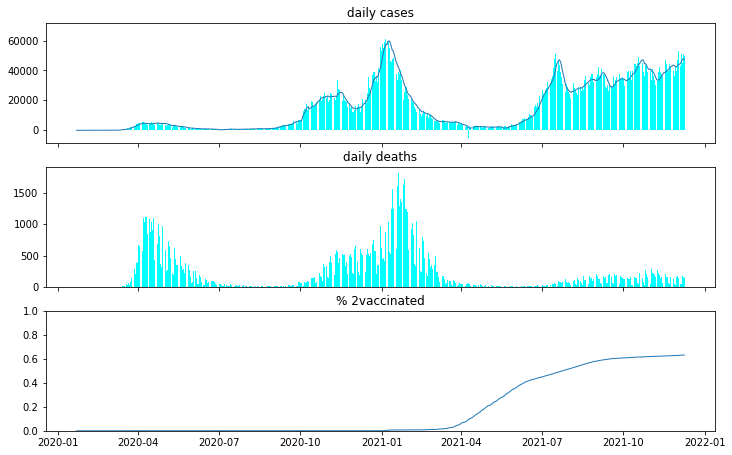

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 1, sharex = True, figsize = (12, 7.5))
ax[0].plot(ukc_new['Date'], ukc_new['smooth_new_confirmed'], linewidth = 1)
ax[0].bar(ukc_new['Date'], ukc_new['new_confirmed'], color = 'cyan')
ax[0].set_title('daily cases')
ax[1].bar(ukc_new['Date'], ukc_new['new_deaths'], color = 'cyan')
ax[1].set_title('daily deaths')
ax[2].plot(ukc['Date'], ukc['totvax2'] / ukc['Population'], linewidth = 1)
ax[2].set_title('% 2vaccinated')
ax[2].set_ylim([0, 1])

plt.show()

# question 9

In [17]:
waves = ukc[['Date', 'Confirmed', 'Deaths', 'totvax2']].loc[(ukc['Date'] == '2020-7-31') | (ukc['Date'] == '2021-4-30') | (ukc['Date'] == '2021-12-09')]
waves['Confirmed'] = waves['Confirmed'].diff().fillna(303181).astype(int)
waves['Deaths'] = waves['Deaths'].diff().fillna(41189).astype(int)
waves['Date'] = ['wave1', 'wave2', 'wave3']
waves['totvax2'] = waves['totvax2']/67886004
waves.rename(columns = {'Date' : 'wave', 'totvax2':'vaxrate'}, inplace = True)
waves['cfr'] = waves['Deaths'] / waves['Confirmed'] 
waves = waves.reset_index()
del waves['index']
waves

,wave,Confirmed,Deaths,vaxrate,cfr
0,wave1,303181,41189,0.000000,0.135856
1,wave2,4113442,86328,0.202607,0.020987
2,wave3,6244358,18618,0.631773,0.002982


In [18]:
#test question 9
ans = waves # your answer as a DataFrame
GRADER2b.submit_answer(GRADER2b.fetch_question('q9'), ans)

Correct!


True

# question 10

In [110]:
#question 10 is not entirely correct, sometimes deaths are incorrect(maybe due to covidc?)
after = covidc[covidc['Date'] >= '2020-08-01']
before = covidc[covidc['Date'] < '2020-08-01']
before = before.groupby(['Country/Region'])[['Confirmed', 'Deaths']].apply(max).reset_index()
after = after.groupby(['Country/Region'])[['Confirmed', 'Deaths']].apply(max).reset_index()

after['Confirmed'] = after['Confirmed'] - before['Confirmed']
after['Deaths'] = after['Deaths'] - before['Deaths']
after['cfr'] = after['Deaths'] / after['Confirmed']
after.loc[after['Country/Region'] == 'Netherlands']
q10 = after
q10

,Country/Region,Confirmed,Deaths,cfr
0,Afghanistan,120957,6046,0.049985
1,Albania,197587,2971,0.015036
2,Algeria,181830,4916,0.027036
3,Andorra,18347,81,0.004415
4,Angola,64198,1684,0.026231
...,...,...,...,...
188,Vietnam,1366875,27183,0.019887
189,West Bank and Gaza,451440,4744,0.010509
190,Yemen,8319,1464,0.175983
191,Zambia,204599,3517,0.017190


In [74]:
ans = after # your answer as a DataFrame
q = GRADER2b.fetch_question('q10')
submit = ans.loc[ans['Country/Region'].isin(q.countries), q.cols]
GRADER2b.submit_answer(q, submit)

Correct!


True

# question 11

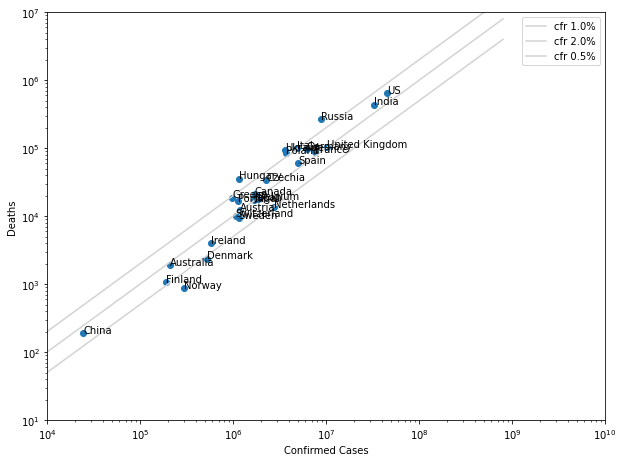

In [189]:
fig, ax = plt.subplots(figsize = (10, 7.5))
countries = ['Austria','Belgium','Czechia','Denmark','Finland','France','Germany',
 'Greece','Hungary','Ireland','Italy',
 'Netherlands','Norway','Poland','Portugal','Spain','Sweden','Switzerland','United Kingdom',
 'Australia','US','Canada','Japan','China','Russia','Ukraine','India']
q11 = q10.loc[q10['Country/Region'].isin(countries)]
ax.loglog(q11['Confirmed'], q11['Deaths'], 'o')
x = np.linspace(1, 80000, 2000)
x_input = x * 10**4
y_input1 = x * 10**2
y_input2 = x * 10**2 * 2
y_input3 = x * 10**2 / 2
ax.plot(x_input, y_input1, '-', label = 'cfr 1.0%', color = 'lightgrey')
ax.plot(x_input, y_input2, label = 'cfr 2.0%', color = 'lightgrey')
ax.plot(x_input, y_input3, label = 'cfr 0.5%', color = 'lightgrey')
ax.legend()
ax.set_xlim([10**4, 10**10])
ax.set_ylim([10, 10**7])

for i, country in enumerate(q11["Country/Region"]):
    ax.annotate(country, (q11["Confirmed"].iloc[i], q11["Deaths"].iloc[i]))

plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.show()

# question 12

In [148]:
#use diff(last row - previous row) to calculate new_confirmed and new_deaths
covidc['new_confirmed'] = covidc['Confirmed'].diff().fillna(0).astype(int)
covidc['new_deaths'] = covidc['Deaths'].diff().fillna(0).astype(int) 

#calculate avg value of past 6 days and use list comprehension to construct the corresponding vector
covidc['smooth_new_confirmed'] = covidc['new_confirmed'].rolling(window=7).mean().fillna(0)

covidc_new = covidc[['Country/Region','Date', 'Confirmed', 'Deaths', 'new_confirmed', 'new_deaths', 'smooth_new_confirmed']]

q12 = covidc_new.copy()
q12['infected'] = q12['smooth_new_confirmed'].rolling(window = 10).sum()
q12['inc'] = q12['infected'] / q12['infected'].shift(1)
q12['R']  = 10 * (q12['inc'] - 1) + 1
q12

,Country/Region,Date,Confirmed,Deaths,new_confirmed,new_deaths,smooth_new_confirmed,infected,inc,R
0,Afghanistan,2020-01-22,0,0,0,0,0.000000,NaN,NaN,NaN
280,Afghanistan,2020-01-23,0,0,0,0,0.000000,NaN,NaN,NaN
560,Afghanistan,2020-01-24,0,0,0,0,0.000000,NaN,NaN,NaN
840,Afghanistan,2020-01-25,0,0,0,0,0.000000,NaN,NaN,NaN
1120,Afghanistan,2020-01-26,0,0,0,0,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
191519,Zimbabwe,2021-12-05,139046,4710,523,1,727.857143,2836.142857,1.328938,4.289377
191799,Zimbabwe,2021-12-06,139046,4710,0,0,688.571429,3490.000000,1.230545,3.305445
192079,Zimbabwe,2021-12-07,141601,4713,2555,3,996.571429,4455.000000,1.276504,3.765043
192359,Zimbabwe,2021-12-08,150628,4720,9027,7,2184.428571,6596.000000,1.480584,5.805836


In [151]:
ans = q12 # Your answer as a DataFrame
q = GRADER2b.fetch_question('q12')
want = pd.DataFrame(q.rows).assign(Date=lambda df: pd.to_datetime(df.Date))
submit = ans.merge(want)[q.cols].assign(Date=lambda df: df.Date.astype(str))
GRADER2b.submit_answer(q, submit)

Correct!


True

# question 13

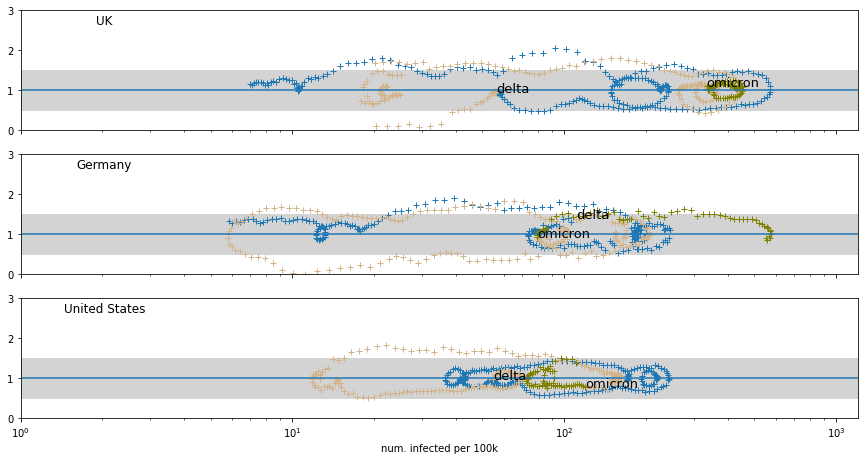

(56192.71428571428, 0.9450348020216262)

In [220]:
uk = q12.loc[(q12['Country/Region'] == 'United Kingdom') & (q12['Date'] >= '2020-08-01')]
uk_org = uk.loc[(uk['Date'] <= '2021-03-21')]
uk_delta = uk.loc[(uk['Date'] >= '2021-03-21') & (uk['Date'] <= '2021-10-01')]
uk_om = uk.loc[(uk['Date'] >= '2021-10-01')]
us = q12.loc[(q12['Country/Region'] == 'US') & (q12['Date'] >= '2020-08-01')]
us_org = us.loc[(us['Date'] <= '2021-03-21')]
us_delta = us.loc[(us['Date'] >= '2021-03-21') & (us['Date'] <= '2021-10-01')]
us_om = us.loc[(us['Date'] >= '2021-10-01')]
germany = q12.loc[(q12['Country/Region'] == 'Germany') & (q12['Date'] >= '2020-08-01')]
ger_org = germany.loc[(germany['Date'] <= '2021-03-21')]
ger_delta = germany.loc[(germany['Date'] >= '2021-03-21') & (germany['Date'] <= '2021-10-01')]
ger_om = germany.loc[(germany['Date'] >= '2021-10-01')]


fig, ax = plt.subplots(3, 1, sharex = True, figsize = (15, 7.5))
ax[0].plot(uk_org['infected'] / 1000, uk_org['R'], '+')
ax[0].plot(uk_delta['infected'] / 1000, uk_delta['R'], '+', color = 'tan')
ax[0].plot(uk_om['infected'] / 1000, uk_om['R'], '+', color = 'olive')
ax[0].set_xlim([1, 1200])
ax[0].set_ylim([0.0, 3.0])
ax[0].set_xscale('log')
ax[0].axhline(y = 1.0)
ax[0].axhspan(ymin = 0.5, ymax = 1.5, color = 'lightgrey')
ax[0].set_title('UK', x = 0.1, y=1.0, pad=-14)
ax[1].plot(ger_org['infected'] / 1000, ger_org['R'], '+')
ax[1].plot(ger_delta['infected'] / 1000, ger_delta['R'], '+', color = 'tan')
ax[1].plot(ger_om['infected'] / 1000, ger_om['R'], '+', color = 'olive')
ax[1].set_xlim([1, 1200])
ax[1].set_ylim([0.0, 3.0])
ax[1].set_xscale('log')
ax[1].axhline(y = 1.0)
ax[1].axhspan(ymin = 0.5, ymax = 1.5, color = 'lightgrey')
ax[1].set_title('Germany', x = 0.1, y=1.0, pad=-14)
ax[2].plot(us_org['infected'] / 10000, us_org['R'], '+')
ax[2].plot(us_delta['infected'] / 10000, us_delta['R'], '+', color = 'tan')
ax[2].plot(us_om['infected'] / 10000, us_om['R'], '+', color = 'olive')
ax[2].set_xlim([1, 1200])
ax[2].set_ylim([0.0, 3.0])
ax[2].set_xscale('log')
ax[2].axhline(y = 1.0)
ax[2].axhspan(ymin = 0.5, ymax = 1.5, color = 'lightgrey')
ax[2].set_title('United States', x = 0.1, y=1.0, pad=-14)

ax[0].annotate('delta', xy = (uk_delta['infected'].iat[0] / 1000, uk_delta['R'].iat[0]), fontsize = 13)
ax[0].annotate('omicron', xy = (uk_om['infected'].iat[0] / 1000, uk_om['R'].iat[0]), fontsize = 13)
ax[1].annotate('delta', xy = (ger_delta['infected'].iat[0] / 1000, ger_delta['R'].iat[0]), fontsize = 13)
ax[1].annotate('omicron', xy = (ger_om['infected'].iat[0] / 1000, ger_om['R'].iat[0]), fontsize = 13)
ax[2].annotate('delta', xy = (us_delta['infected'].iat[0] / 10000, us_delta['R'].iat[0]), fontsize = 13)
ax[2].annotate('omicron', xy = (us_om['infected'].iat[0] / 10000, us_om['R'].iat[0]), fontsize = 13)
plt.xlabel('num. infected per 100k')

plt.show()
(uk_delta['infected'].iat[0], uk_delta['R'].iat[0])